In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

Please download only the fashion_mnist_test.csv file from this [kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_test.csv) link.

In [2]:
df = pd.read_csv("/tmp/fashion-mnist_test.csv")

We know that 10 dimensions explain 72% of the variation in images.

In [3]:
from sklearn.decomposition import PCA
images = df.iloc[:,1:].values
pca = PCA(n_components=10)
images_low_dim = pca.fit_transform(images)

In [4]:
images_low_dim.shape

(10000, 10)

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=10)
y_pred = kmeans.fit_predict(images_low_dim)

In [7]:
y_pred

array([2, 7, 9, ..., 5, 4, 8], dtype=int32)

In [11]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y_pred.squeeze(), df["label"].values.squeeze())

0.3665259746184975

In [12]:
adjusted_rand_score(df["label"].values.squeeze(), y_pred.squeeze())

0.3665259746184975

In [13]:
y_pred

array([2, 7, 9, ..., 5, 4, 8], dtype=int32)

## Visual inspection

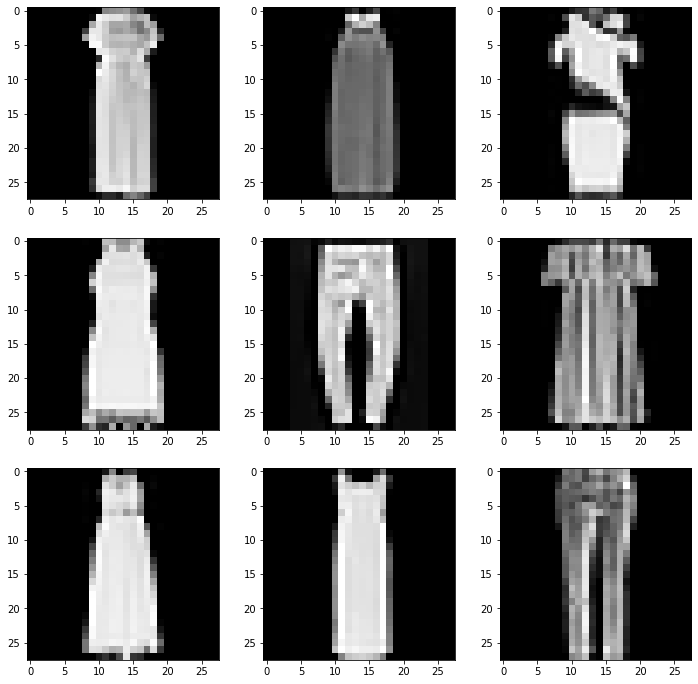

In [10]:
label = 7
idx = y_pred == label

fig, ax = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        img = random.choice(images[idx])
        ax[i][j].imshow(img.reshape(28, 28), cmap="gray")